In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import os

In [2]:
def preprocess_admission(file_path):
    
    df_adm = pd.read_csv(file_path, delimiter = ";")
    df_adm.drop(df_adm.columns[[0]], axis=1, inplace=True) 
    df_adm["num_admission"] = df_adm.groupby("pat_id").cumcount()+1
    
    df_adm["re_admission_freq"] = df_adm["num_admission"].copy()
    df_adm["re_admission_freq"]  = df_adm.re_admission_freq.replace(to_replace=[1, 2,3,4], value=[ "ONCE",  "TWICE","THRICE", "MORE_THAN_THRICE"])
#     df_adm["re_admission"] = df_adm.re_admission.replace(to_replace=[1, 2,3,4], value=["N", "ONCE",  "TWICE", "MORE_THAN_TWICE"])
    
    print("Readmissions:",df_adm["re_admission_freq"].value_counts())
    return df_adm
    

In [3]:

df_adm = preprocess_admission("D:/Downloads_2021/Pacmed_Data_Science_Assignment/admission.csv")
df_adm

Readmissions: ONCE                1495
TWICE                 66
THRICE                 7
MORE_THAN_THRICE       1
Name: re_admission_freq, dtype: int64


,pat_id,date_admission,date_discharge,num_admission,re_admission_freq
0,1081,2014-05-14,2014-05-16,1,ONCE
1,1304,2014-06-13,2014-06-14,1,ONCE
2,1101,2014-05-14,2014-05-17,1,ONCE
3,895,2014-06-24,2014-06-25,1,ONCE
4,1468,2014-07-24,2014-07-25,1,ONCE
...,...,...,...,...,...
1564,927,2016-09-10,2016-09-11,1,ONCE
1565,514,2016-08-11,2016-08-12,1,ONCE
1566,775,2016-08-21,2016-08-27,1,ONCE
1567,383,2016-08-02,2016-08-03,1,ONCE


In [4]:
df_adm['date_admission'] = pd.to_datetime(df_adm['date_admission'])
df_adm['date_discharge'] = pd.to_datetime(df_adm['date_discharge'])
df_adm['dates'] = [pd.date_range(x, y) for x , y in zip(df_adm['date_admission'],df_adm['date_discharge'])]
df_adm = df_adm.explode('dates')
df_adm

,pat_id,date_admission,date_discharge,num_admission,re_admission_freq,dates
0,1081,2014-05-14,2014-05-16,1,ONCE,2014-05-14
0,1081,2014-05-14,2014-05-16,1,ONCE,2014-05-15
0,1081,2014-05-14,2014-05-16,1,ONCE,2014-05-16
1,1304,2014-06-13,2014-06-14,1,ONCE,2014-06-13
1,1304,2014-06-13,2014-06-14,1,ONCE,2014-06-14
...,...,...,...,...,...,...
1567,383,2016-08-02,2016-08-03,1,ONCE,2016-08-02
1567,383,2016-08-02,2016-08-03,1,ONCE,2016-08-03
1568,845,2016-08-22,2016-08-24,1,ONCE,2016-08-22
1568,845,2016-08-22,2016-08-24,1,ONCE,2016-08-23


In [25]:
# df_adm[df_adm["pat_id"] == 1546]

In [5]:
df_adm1 =df_adm.copy()
df_adm1.drop(labels=['date_admission','date_discharge'], axis=1, inplace=True)
df_adm1

,pat_id,num_admission,re_admission_freq,dates
0,1081,1,ONCE,2014-05-14
0,1081,1,ONCE,2014-05-15
0,1081,1,ONCE,2014-05-16
1,1304,1,ONCE,2014-06-13
1,1304,1,ONCE,2014-06-14
...,...,...,...,...
1567,383,1,ONCE,2016-08-02
1567,383,1,ONCE,2016-08-03
1568,845,1,ONCE,2016-08-22
1568,845,1,ONCE,2016-08-23


In [6]:
df_age = pd.read_csv("D:/Downloads_2021/PacMed/Pacmed_Data_Science_Assignment/age.csv", delimiter = ";", index_col = 0)
df_age

,pat_id,age
0,0,35.0
1,1,77.0
2,2,77.0
3,3,61.0
4,4,27.0
...,...,...
1490,1564,87.0
1491,1565,68.0
1492,1566,73.0
1493,1567,83.0


In [7]:
file_signal ="D:/Downloads_2021/PacMed/Pacmed_Data_Science_Assignment/signal.csv"

def preprocess_signal(file_signal):
    
    df_signal = pd.read_csv(file_signal, delimiter = ";", index_col = 0,  parse_dates =['day', 'hour'])
    df_signal.drop(df_signal.columns[[0]], axis=1, inplace=True) 

    df_signal["time"] = df_signal.hour.astype(str)+ ':00:00'
    df_signal["time"] = pd.to_datetime(df_signal[['day','time']].astype(str).agg(' '.join,1))
    # df_signal = pd.to_datetime(df_signal.day.astype(str) + ' ' + df_signal.hour.astype(str))
    
    parameters = df_signal['parameter'].unique()
    
    df2=pd.concat([df_signal.set_index(['pat_id','day','time']).groupby('parameter')['value'].get_group(key) for key in parameters],axis=1)
    df2.columns=parameters
    df2.reset_index(inplace=True)
    # print(df2)
    return df2

In [8]:
df_signal = preprocess_signal(file_signal)
df_signal

,pat_id,day,time,blood_pressure,respiration_rate,temperature
0,0,2016-01-05,2016-01-05 23:00:00,104.543181,NaN,NaN
1,0,2016-01-06,2016-01-06 00:00:00,110.542544,NaN,NaN
2,0,2016-01-06,2016-01-06 01:00:00,133.832002,NaN,NaN
3,0,2016-01-06,2016-01-06 02:00:00,133.067666,NaN,NaN
4,0,2016-01-06,2016-01-06 03:00:00,134.566003,NaN,NaN
...,...,...,...,...,...,...
65932,1568,2016-01-19,2016-01-19 09:00:00,166.386488,4.0,NaN
65933,1568,2016-01-19,2016-01-19 10:00:00,143.166335,NaN,NaN
65934,1568,2016-01-19,2016-01-19 11:00:00,145.432503,NaN,NaN
65935,1568,2016-01-19,2016-01-19 12:00:00,144.899670,4.0,NaN


In [9]:
# df_signal["hours_lapsed"] = df_signal.groupby("pat_id")["time"].cumcount()
# df_signal

In [10]:
# df_signal.drop(df_signal.columns[[-1]], axis=1, inplace=True) 

In [11]:

new_df = pd.merge(df_signal, df_adm1,  how='left', left_on=['pat_id','day'], right_on = ['pat_id','dates'])

# df3
new_df

,pat_id,day,time,blood_pressure,respiration_rate,temperature,num_admission,re_admission_freq,dates
0,0,2016-01-05,2016-01-05 23:00:00,104.543181,NaN,NaN,1.0,ONCE,2016-01-05
1,0,2016-01-06,2016-01-06 00:00:00,110.542544,NaN,NaN,1.0,ONCE,2016-01-06
2,0,2016-01-06,2016-01-06 01:00:00,133.832002,NaN,NaN,1.0,ONCE,2016-01-06
3,0,2016-01-06,2016-01-06 02:00:00,133.067666,NaN,NaN,1.0,ONCE,2016-01-06
4,0,2016-01-06,2016-01-06 03:00:00,134.566003,NaN,NaN,1.0,ONCE,2016-01-06
...,...,...,...,...,...,...,...,...,...
65943,1568,2016-01-19,2016-01-19 09:00:00,166.386488,4.0,NaN,1.0,ONCE,2016-01-19
65944,1568,2016-01-19,2016-01-19 10:00:00,143.166335,NaN,NaN,1.0,ONCE,2016-01-19
65945,1568,2016-01-19,2016-01-19 11:00:00,145.432503,NaN,NaN,1.0,ONCE,2016-01-19
65946,1568,2016-01-19,2016-01-19 12:00:00,144.899670,4.0,NaN,1.0,ONCE,2016-01-19


In [12]:

new_df = pd.merge(df_signal, df_adm1,  how='left', left_on=['pat_id','day'], right_on = ['pat_id','dates'])

# df3
new_df

,pat_id,day,time,blood_pressure,respiration_rate,temperature,num_admission,re_admission_freq,dates
0,0,2016-01-05,2016-01-05 23:00:00,104.543181,NaN,NaN,1.0,ONCE,2016-01-05
1,0,2016-01-06,2016-01-06 00:00:00,110.542544,NaN,NaN,1.0,ONCE,2016-01-06
2,0,2016-01-06,2016-01-06 01:00:00,133.832002,NaN,NaN,1.0,ONCE,2016-01-06
3,0,2016-01-06,2016-01-06 02:00:00,133.067666,NaN,NaN,1.0,ONCE,2016-01-06
4,0,2016-01-06,2016-01-06 03:00:00,134.566003,NaN,NaN,1.0,ONCE,2016-01-06
...,...,...,...,...,...,...,...,...,...
65943,1568,2016-01-19,2016-01-19 09:00:00,166.386488,4.0,NaN,1.0,ONCE,2016-01-19
65944,1568,2016-01-19,2016-01-19 10:00:00,143.166335,NaN,NaN,1.0,ONCE,2016-01-19
65945,1568,2016-01-19,2016-01-19 11:00:00,145.432503,NaN,NaN,1.0,ONCE,2016-01-19
65946,1568,2016-01-19,2016-01-19 12:00:00,144.899670,4.0,NaN,1.0,ONCE,2016-01-19


In [13]:
new_df["hours_lapsed"] = new_df.groupby(["pat_id","re_admission_freq"]).cumcount()

In [14]:
new_df[new_df["pat_id"]==1546]
# 1338

,pat_id,day,time,blood_pressure,respiration_rate,temperature,num_admission,re_admission_freq,dates,hours_lapsed
65032,1546,2015-06-09,2015-06-09 15:00:00,NaN,24.01,37.538460,1.0,ONCE,2015-06-09,0
65033,1546,2015-06-09,2015-06-09 16:00:00,NaN,23.99,NaN,1.0,ONCE,2015-06-09,1
65034,1546,2015-06-09,2015-06-09 17:00:00,112.044352,30.00,NaN,1.0,ONCE,2015-06-09,2
65035,1546,2015-06-09,2015-06-09 18:00:00,121.736669,NaN,NaN,1.0,ONCE,2015-06-09,3
65036,1546,2015-06-09,2015-06-09 19:00:00,144.272546,NaN,NaN,1.0,ONCE,2015-06-09,4
...,...,...,...,...,...,...,...,...,...,...
65158,1546,2015-06-17,2015-06-17 06:00:00,144.150763,NaN,37.333332,2.0,TWICE,2015-06-17,31
65159,1546,2015-06-17,2015-06-17 07:00:00,145.033173,NaN,NaN,2.0,TWICE,2015-06-17,32
65160,1546,2015-06-17,2015-06-17 08:00:00,181.798686,NaN,NaN,2.0,TWICE,2015-06-17,33
65161,1546,2015-06-17,2015-06-17 09:00:00,184.917283,NaN,NaN,2.0,TWICE,2015-06-17,34


In [15]:
new_df2 = pd.merge(new_df, df_age,  how='left')
new_df2

,pat_id,day,time,blood_pressure,respiration_rate,temperature,num_admission,re_admission_freq,dates,hours_lapsed,age
0,0,2016-01-05,2016-01-05 23:00:00,104.543181,NaN,NaN,1.0,ONCE,2016-01-05,0,35.0
1,0,2016-01-06,2016-01-06 00:00:00,110.542544,NaN,NaN,1.0,ONCE,2016-01-06,1,35.0
2,0,2016-01-06,2016-01-06 01:00:00,133.832002,NaN,NaN,1.0,ONCE,2016-01-06,2,35.0
3,0,2016-01-06,2016-01-06 02:00:00,133.067666,NaN,NaN,1.0,ONCE,2016-01-06,3,35.0
4,0,2016-01-06,2016-01-06 03:00:00,134.566003,NaN,NaN,1.0,ONCE,2016-01-06,4,35.0
...,...,...,...,...,...,...,...,...,...,...,...
65943,1568,2016-01-19,2016-01-19 09:00:00,166.386488,4.0,NaN,1.0,ONCE,2016-01-19,18,64.0
65944,1568,2016-01-19,2016-01-19 10:00:00,143.166335,NaN,NaN,1.0,ONCE,2016-01-19,19,64.0
65945,1568,2016-01-19,2016-01-19 11:00:00,145.432503,NaN,NaN,1.0,ONCE,2016-01-19,20,64.0
65946,1568,2016-01-19,2016-01-19 12:00:00,144.899670,4.0,NaN,1.0,ONCE,2016-01-19,21,64.0


In [42]:
new_df2['re_admission_freq'].value_counts()

ONCE                61403
TWICE                4109
THRICE                354
MORE_THAN_THRICE       81
Name: re_admission_freq, dtype: int64

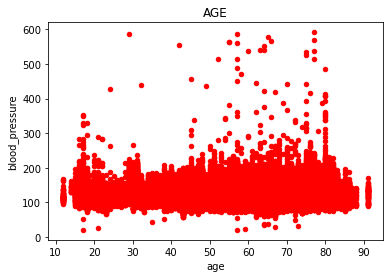

In [31]:
new_df2.plot(kind = 'scatter',
        x = 'age',
        y = 'blood_pressure',
        color = 'red')
  
# set the title
plt.title('AGE')
  
# show the plot
plt.show()

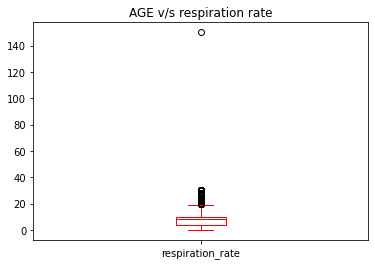

In [29]:
new_df2.plot(kind = 'box',
        x = 'age',
        y = 'respiration_rate',
        color = 'red')
  
# set the title
plt.title('AGE v/s respiration rate')
  
# show the plot
plt.show()

,pat_id,blood_pressure,respiration_rate,temperature,num_admission,hours_lapsed,age
pat_id,1.000000,0.000085,0.000349,0.046092,0.169107,0.029562,-0.013224
blood_pressure,0.000085,1.000000,-0.027158,0.083369,0.013177,0.146672,0.004691
respiration_rate,0.000349,-0.027158,1.000000,0.136915,0.017938,0.006102,-0.009710
temperature,0.046092,0.083369,0.136915,1.000000,0.133761,0.206231,0.002482
num_admission,0.169107,0.013177,0.017938,0.133761,1.000000,0.074787,-0.014382
hours_lapsed,0.029562,0.146672,0.006102,0.206231,0.074787,1.000000,-0.042628
age,-0.013224,0.004691,-0.009710,0.002482,-0.014382,-0.042628,1.000000


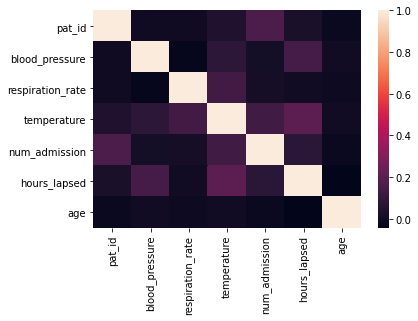

In [17]:
corr = new_df2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

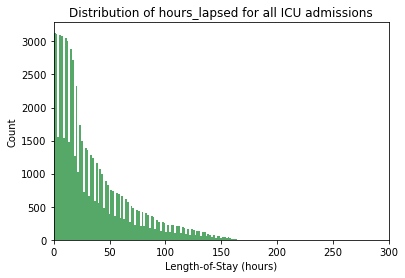

In [25]:
# Plot LOS Distribution
plt.hist(new_df2['hours_lapsed'], bins=100, color = '#55a868')
plt.xlim(0, 300)
plt.title('Distribution of hours_lapsed for all ICU admissions')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (hours)')
plt.tick_params(top=False, right=False) 
plt.show()

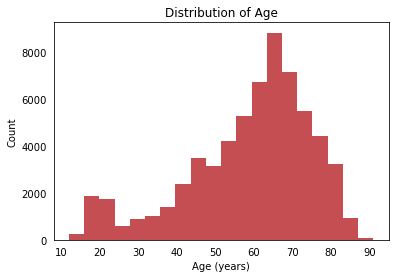

In [26]:
plt.hist(new_df2['age'], bins=20, color='#c44e52')
plt.ylabel('Count')
plt.xlabel('Age (years)')
plt.title('Distribution of Age')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show()

In [64]:
new_df2

,pat_id,day,time,blood_pressure,respiration_rate,temperature,num_admission,re_admission_freq,dates,hours_lapsed,age,age_category
0,0,2016-01-05,2016-01-05 23:00:00,104.543181,NaN,NaN,1.0,ONCE,2016-01-05,0,35.0,young_adult
1,0,2016-01-06,2016-01-06 00:00:00,110.542544,NaN,NaN,1.0,ONCE,2016-01-06,1,35.0,young_adult
2,0,2016-01-06,2016-01-06 01:00:00,133.832002,NaN,NaN,1.0,ONCE,2016-01-06,2,35.0,young_adult
3,0,2016-01-06,2016-01-06 02:00:00,133.067666,NaN,NaN,1.0,ONCE,2016-01-06,3,35.0,young_adult
4,0,2016-01-06,2016-01-06 03:00:00,134.566003,NaN,NaN,1.0,ONCE,2016-01-06,4,35.0,young_adult
...,...,...,...,...,...,...,...,...,...,...,...,...
65943,1568,2016-01-19,2016-01-19 09:00:00,166.386488,4.0,NaN,1.0,ONCE,2016-01-19,18,64.0,senior
65944,1568,2016-01-19,2016-01-19 10:00:00,143.166335,NaN,NaN,1.0,ONCE,2016-01-19,19,64.0,senior
65945,1568,2016-01-19,2016-01-19 11:00:00,145.432503,NaN,NaN,1.0,ONCE,2016-01-19,20,64.0,senior
65946,1568,2016-01-19,2016-01-19 12:00:00,144.899670,4.0,NaN,1.0,ONCE,2016-01-19,21,64.0,senior


In [27]:
new_df2['age_category']  = new_df2["age"]

age_ranges = [(0, 13), (13, 36), (36, 56), (56, 100)]
for num, cat_range in enumerate(age_ranges):
    new_df2['age_category'] = np.where(new_df2['age_category'].between(cat_range[0],cat_range[1]), 
            num, new_df2['age_category'])
    
age_dict = {0: 'newborn', 1: 'young_adult', 2: 'middle_adult', 3: 'senior'}
new_df2['age_category'] = new_df2['age_category'].replace(age_dict)
new_df2.age_category.value_counts()

senior          41088
middle_adult    15213
young_adult      6504
newborn            65
Name: age_category, dtype: int64

In [35]:
variables = ['blood_pressure', 'respiration_rate',
             'temperature', 'age']
# hours_lapsed,  're_admission_freq',

variables_mort = variables.copy()
variables_mort.append('hours_lapsed')

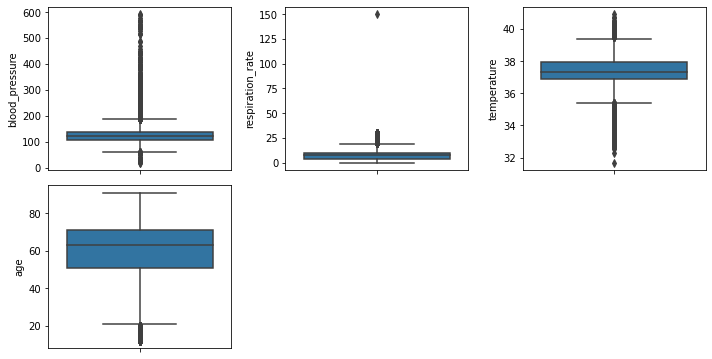

In [36]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
count = 0
for variable in variables:
    count += 1
    plt.subplot(4, 3, count)    
    ax = sns.boxplot(y=variable, data=new_df2)
    
fig.tight_layout()
plt.show()

In [67]:
new_df2['hours_lapsed'].describe()

count    65948.000000
mean        34.162022
std         32.652785
min          0.000000
25%         10.000000
50%         22.000000
75%         49.000000
max        164.000000
Name: hours_lapsed, dtype: float64

In [47]:
new_df2['blood_pressure'].describe()

count    63145.000000
mean       125.969744
std         26.925153
min         20.000005
25%        108.299836
50%        122.334168
75%        139.425431
max        592.000007
Name: blood_pressure, dtype: float64

In [48]:
new_df2['respiration_rate'].describe()

count    30063.000000
mean         8.365972
std          5.388348
min         -0.010000
25%          4.010000
50%          8.000000
75%         10.010000
max        149.990000
Name: respiration_rate, dtype: float64

<AxesSubplot:>

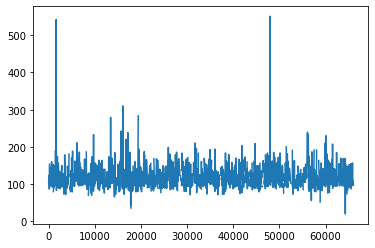

In [61]:
#Average Reading when a patient is admitted in an ICU

df_hour0 = new_df2[new_df2['hours_lapsed']== 0]
df_hour0['blood_pressure'].plot()

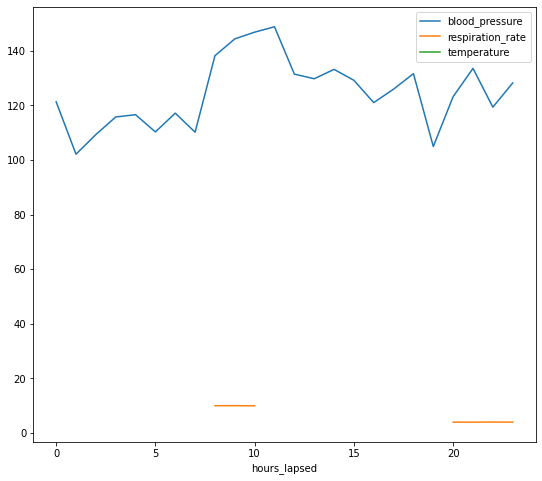

In [65]:
# new_df2[new_df2["pat_id"]==1546]

df_thrice = new_df2[new_df2["pat_id"] ==1080 ]


ax = df_thrice.plot(x="hours_lapsed", y=["blood_pressure", "respiration_rate",'temperature'], kind="line", figsize=(9, 8),x_compat=True)
# ax.xaxis.set_major_locator(mdates.HOURLY)
plt.show()

In [66]:
df_

,pat_id,day,time,blood_pressure,respiration_rate,temperature,num_admission,re_admission_freq,dates,hours_lapsed,age,age_category
43703,1080,2015-11-24,2015-11-24 12:00:00,121.285718,NaN,NaN,1.0,ONCE,2015-11-24,0,68.0,senior
43704,1080,2015-11-24,2015-11-24 13:00:00,102.098999,NaN,NaN,1.0,ONCE,2015-11-24,1,68.0,senior
43705,1080,2015-11-24,2015-11-24 14:00:00,109.301002,NaN,NaN,1.0,ONCE,2015-11-24,2,68.0,senior
43706,1080,2015-11-24,2015-11-24 15:00:00,115.734670,NaN,NaN,1.0,ONCE,2015-11-24,3,68.0,senior
43707,1080,2015-11-24,2015-11-24 16:00:00,116.566335,NaN,NaN,1.0,ONCE,2015-11-24,4,68.0,senior
43708,1080,2015-11-24,2015-11-24 17:00:00,110.266668,NaN,NaN,1.0,ONCE,2015-11-24,5,68.0,senior
43709,1080,2015-11-24,2015-11-24 18:00:00,117.132002,NaN,NaN,1.0,ONCE,2015-11-24,6,68.0,senior
43710,1080,2015-11-24,2015-11-24 19:00:00,110.167835,NaN,NaN,1.0,ONCE,2015-11-24,7,68.0,senior
43711,1080,2015-11-24,2015-11-24 20:00:00,138.167837,10.00,NaN,1.0,ONCE,2015-11-24,8,68.0,senior
43712,1080,2015-11-24,2015-11-24 21:00:00,144.336002,10.01,NaN,1.0,ONCE,2015-11-24,9,68.0,senior
